In [1]:
r_m = [[1.4886142, 0.8456213, 2.136997, 4.941508, 2.985246, 1.932116, 0.53975916, 1.1956012, 3.4974842, 3.7163546,
        0.37741286, 3.2192883],
       [1.7710884, 2.8999279, 1.5591438, 2.5739675, 0.36148265, 4.0796123, 0.19468784, 0.41717866, 0.44161805, 2.858394,
        0.64020824, 1.8696929],
       [3.2411544, 1.4165895, 1.9165912, 1.760249, 4.946924, 4.0427003, 4.0804954, 3.8089445, 3.0171409, 3.2375948,
        1.051466, 2.028216],
       [3.668133, 2.023943, 4.670376, 1.4255198, 0.9299506, 0.5426398, 1.6190097, 1.2455684, 3.825147, 4.2921057,
        1.1633718, 0.47321957],
       [1.7753079, 4.4532833, 1.8346862, 0.8180791, 4.368987, 1.8748162, 3.3748724, 2.7547379, 1.084064, 3.923028,
        0.912049, 1.633536],
       [4.5770545, 3.7520282, 0.26316088, 0.32538202, 3.827253, 1.0943422, 2.193553, 2.539213, 2.9938908, 3.051608,
        4.9113183, 2.3171308],
       [2.9307108, 4.358497, 4.0927663, 1.3401148, 1.9592247, 3.0486445, 4.8886576, 1.3506546, 1.934777, 3.8792076,
        1.8799514, 4.907252],
       [3.688964, 3.4612098, 1.2939997, 1.3174696, 0.9073608, 2.6526885, 2.472786, 1.8772297, 4.4024687, 1.1228155,
        2.9902546, 4.505084],
       [0.7336474, 2.9115882, 0.19073708, 2.27222, 1.4719074, 0.9961275, 4.165045, 2.6126196, 4.474238, 0.71501017,
        2.0895965, 1.4055438],
       [2.447018, 1.0646493, 3.3767536, 2.263373, 2.313686, 1.7354474, 1.9270022, 1.7004374, 4.133756, 2.2387974,
        2.8513665, 2.1114748],
       [1.1160762, 1.8740808, 3.1195884, 1.3742502, 2.7280214, 1.960381, 2.7193341, 4.1256075, 1.2675519, 4.688991,
        0.63170415, 4.1508236],
       [4.630166, 0.84973407, 2.9772265, 2.353126, 4.3826966, 4.2475386, 3.7644026, 1.9522374, 3.261402, 3.5550673,
        2.9840074, 3.2882686]]

In [2]:
def plot_matrix(matrix):
    plt.imshow(matrix, cmap='viridis')  # 使用'viridis'颜色映射
    plt.colorbar()  # 添加颜色条
    plt.show()

In [3]:
import matplotlib.pyplot as plt
def initial_point(radius_matrix):
    max_index = np.unravel_index(np.argmax(radius_matrix), radius_matrix.shape)
    return max_index

def Translate_Forward_Strategy(radius_matrix,adjoint_matrix,x,y):
    rows = len(radius_matrix)
    cols = len(radius_matrix[0])
    max_radius = int(np.max(radius_matrix))
    x_left = x_right = y_up = y_down = 0
    x_temp = x - 1
    if  adjoint_matrix[x_temp,y] == 0  and adjoint_matrix [x_temp,y] == 0:#and x_temp-max_radius>0
        y_min = max(0,y - max_radius)
        y_max = min(cols,y + max_radius)
        increase_count = 0
        for j in range(y_min,y_max):
           if math.sqrt(max_radius ** 2 + (y - j) ** 2) <= radius_matrix[x_temp - max_radius, j]/ 37.04:
               increase_count = increase_count + 1

        x_left = increase_count

    x_temp = x + 1
    if  adjoint_matrix[x_temp,y] == 0 and x_temp + max_radius < rows-1 and adjoint_matrix [x_temp,y] == 0:
        y_min = max(0,y - max_radius)
        y_max = min(cols,y + max_radius)
        increase_count = 0
        for j in range(y_min,y_max):
           if math.sqrt(max_radius ** 2 + (y - j) ** 2) <= radius_matrix[x_temp + max_radius, j]/ 37.04:
               increase_count = increase_count + 1

        x_right = increase_count

    y_temp = y - 1
    if adjoint_matrix[x, y_temp] == 0 and y_temp - max_radius > 0 and adjoint_matrix [x,y_temp]:
        x_min = max(0, x - max_radius)
        x_max = min(cols, x + max_radius)
        increase_count = 0
        for i in range(x_min, x_max):
            if math.sqrt(max_radius ** 2 + (x - i) ** 2) <= radius_matrix[y_temp - max_radius, i] / 37.04:
                increase_count = increase_count + 1

        y_up = increase_count

    y_temp = y + 1
    if adjoint_matrix[x, y_temp] == 0 and y_temp + max_radius < cols -1 and adjoint_matrix [x,y_temp] == 0:
        x_min = max(0, x - max_radius)
        x_max = min(cols, x + max_radius)
        increase_count = 0
        for i in range(x_min, x_max):
            if math.sqrt(max_radius ** 2 + (x - i) ** 2) <= radius_matrix[y_temp + max_radius, i] / 37.04:
                increase_count = increase_count + 1

        y_down = increase_count

    import random

    def select_max_variable(variables):
        max_value = max(variables.values())
        max_variables = [var for var, value in variables.items() if value == max_value]
        selected_variable = random.choice(max_variables)
        return selected_variable

    variables = {"x_left": x_left, "x_right": x_right, "y_up": y_up, "y_down": y_down}
    # 调用函数选择最大的数值对应的变量
    selected_variable = select_max_variable(variables)

    return selected_variable

def convert_radius_to_activation_test(radius_matrix):
    # 获取半径矩阵的行数和列数
    rows, cols = radius_matrix.shape
#     print(rows, cols)
    # 初始化激活矩阵，全部置零
    activation_matrix = np.zeros((rows, cols))

    # 遍历半径矩阵的每个元素
    max_radius = int(np.max(radius_matrix))
#     print(max_radius)
    for i in range(rows):
        for j in range(cols):
#             print("--------------i,j: {} {}".format(i, j))
            activation_count = 0
            # 扩展半径范围，包括边缘情况
            y_max = min(cols - 1, j + max_radius)
            y_min = max(0, j - max_radius)
            x_min = max(0, i - max_radius)
            x_max = min(rows - 1, i + max_radius)
#             print("y_max: {}, y_min: {}, x_min: {}, x_max: {}".format(y_max, y_min, x_min, x_max))
            for ii in range(x_min, x_max + 1):
                for jj in range(y_min, y_max + 1):
#                     print("ii: {}, jj: {}, radius_matrix :{}".format(ii,jj,radius_matrix[ii, jj]))
#                     print("距离: {} radius_matrix: {} ".format(math.sqrt((ii - i) ** 2 + (jj - j) ** 2),radius_matrix[ii, jj]))
                    if math.sqrt((ii - i) ** 2 + (jj - j) ** 2) <= radius_matrix[ii, jj] : #/ 37.04
                        activation_count =  activation_count + 1
#                         print("activation_count : {}".format(activation_count))

            # 在激活范围内更新激活矩阵的值
            activation_matrix[i, j] = activation_count
#             print(activation_count)
#             print(activation_matrix)


    return activation_matrix

def update_point(next, point):
    point = list(point)
    if next == "x_left":
        point[0] = point[0] - 1
    elif next == "x_right":
        point[0] = point[0] + 1
    elif next == "y_up":
        point[1] = point[1] - 1
    elif next == "y_down":
        point[1] = point[1] + 1
    return point



#############################
import math
import numpy as np
import pandas as pd
def activation_point(x,y,radius_matrix):
    """
    正式版本——给出一个点和半径矩阵，计算出所有他们能激活的点,不需要激活矩阵
    :param x: 激活点x坐标
    :param y: 激活点y坐标
    :param adjugate_matrix: 激活矩阵
    :return: 返回所有激活点
    """
    activation_point = []
    rows, cols = radius_matrix.shape
    max_radius = int(np.max(radius_matrix))
    y_max = min(cols - 1, y + max_radius)
    y_min = max(0, y - max_radius)
    x_min = max(0, x - max_radius)
    x_max = min(rows - 1, x + max_radius)
    #             print("y_max: {}, y_min: {}, x_min: {}, x_max: {}".format(y_max, y_min, x_min, x_max))
    for ii in range(x_min, x_max + 1):
        for jj in range(y_min, y_max + 1):
            # print("ii: {}, jj: {}, radius_matrix :{}".format(ii,jj,radius_matrix[ii, jj]))
            # print("距离: {} radius_matrix: {} ".format(math.sqrt((ii - x) ** 2 + (jj - y) ** 2),radius_matrix[ii, jj]))
            if math.sqrt((ii - x) ** 2 + (jj - y) ** 2) <= radius_matrix[ii, jj]/ 37.04:  #
                point = list((ii,jj))
                activation_point.append(point)
    return activation_point
def update_radius_matrix(radius_matrix, Adjugate_Matrix):
    assert radius_matrix.shape == Adjugate_Matrix.shape, "输入矩阵尺寸不匹配"

    updated_radius_matrix = np.where(Adjugate_Matrix != 0, 0, radius_matrix)

    return updated_radius_matrix
def update_adjugate_matrix(activation_points, adjugate_matrix):
    """
    更新伴随矩阵，将激活的坐标在伴随矩阵上加一
    :param activation_points:激活点
    :param adjugate_matrix:激活前伴随矩阵
    :return:激活后的伴随矩阵
    """
    for point in activation_points:
        row = point[0]
        col = point[1]
        adjugate_matrix[row][col] = 1          #############

    return adjugate_matrix
# r_m = [[1, 2, 1, 2, 1],
#        [3, 0, 2, 1, 3],
#        [1, 2, 1, 2, 1]]
# df=pd.read_excel("radius_matrix.xlsx",header = None)
# r_m = np.array(df.values)
r_m = np.array(r_m)
c_m = convert_radius_to_activation_test(r_m)
# c_m = pd.read_excel("matrix.xlsx",header = None)
c_m = np.array(c_m)
a_m = np.zeros((len(r_m), len(r_m[0])))



print("Radius Matrix:")
print(r_m)
print("Activation Matrix:")
print(c_m)

# plot_matrix(c_m)

Radius Matrix:
[[1.4886142  0.8456213  2.136997   4.941508   2.985246   1.932116
  0.53975916 1.1956012  3.4974842  3.7163546  0.37741286 3.2192883 ]
 [1.7710884  2.8999279  1.5591438  2.5739675  0.36148265 4.0796123
  0.19468784 0.41717866 0.44161805 2.858394   0.64020824 1.8696929 ]
 [3.2411544  1.4165895  1.9165912  1.760249   4.946924   4.0427003
  4.0804954  3.8089445  3.0171409  3.2375948  1.051466   2.028216  ]
 [3.668133   2.023943   4.670376   1.4255198  0.9299506  0.5426398
  1.6190097  1.2455684  3.825147   4.2921057  1.1633718  0.47321957]
 [1.7753079  4.4532833  1.8346862  0.8180791  4.368987   1.8748162
  3.3748724  2.7547379  1.084064   3.923028   0.912049   1.633536  ]
 [4.5770545  3.7520282  0.26316088 0.32538202 3.827253   1.0943422
  2.193553   2.539213   2.9938908  3.051608   4.9113183  2.3171308 ]
 [2.9307108  4.358497   4.0927663  1.3401148  1.9592247  3.0486445
  4.8886576  1.3506546  1.934777   3.8792076  1.8799514  4.907252  ]
 [3.688964   3.4612098  1.2939997 

起始点[2, 2]
end


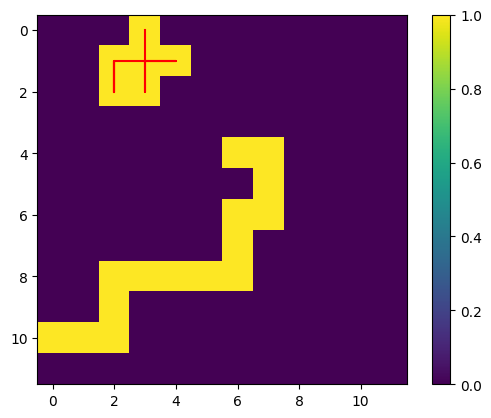

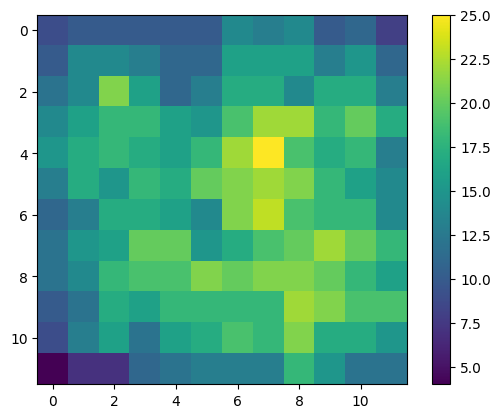

In [5]:
detection_line = []
point = list(initial_point(c_m))
print("起始点{}".format(point))
detection_line.append(point)

while True:
    next = Translate_Forward_Strategy(r_m, a_m, point[0], point[1])
    point = (update_point(next, point))
    if point[0] == 0 or point[0] ==(len(c_m) - 1) or point[1] == 0 or point[1] ==(len(c_m[0]) - 1) :
        detection_line.append(point)
        print("end")
        break
#     print(point)
    detection_line.append(point)
# print(f"detection_line: \n{detection_line}" )
points = []
for point in detection_line:
    p = activation_point(point[0],point[1],r_m)
    for i in p:
        points.append(i)
# print(f"points: {points}")
# print(len(points))

for point in points:
    row = point[0]
    col = point[1]
    a_m[row][col] = 1
# print(f"伴随矩阵\n{a_m}")

r_m = update_radius_matrix(r_m,a_m)
c_m = convert_radius_to_activation_test(r_m)

plt.imshow(a_m, cmap='viridis')
lines_arr = np.array(detection_line)
# 分别获取x和y坐标数组
x_coords = lines_arr[:, 0]
y_coords = lines_arr[:, 1]
# 绘制直线
plt.plot( y_coords,x_coords, color='red')

plt.colorbar()  # 添加颜色条
plt.show()
plot_matrix(c_m)